In [1]:
# !pip install opencv-python==4.5.5.64

In [2]:
# !pip install tensorflow==2.10.1

In [3]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [4]:
import xml.etree.ElementTree as xet   ## to parse the xml
from glob import glob ## glob will recursively find the files within the folder

In [5]:
import os
xml_path = os.path.join(os.getcwd(),'images','*xml')
path = glob(xml_path)

In [6]:
xml_path

'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\*xml'

In [7]:
path

['D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N1.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N100.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N101.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N102.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N103.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N104.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N105.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N106.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N107.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N108.xml',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_

In [8]:
label_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])

In [9]:
for file in path:
    data = xet.parse(file)
    root = data.getroot()
    object = root.find('object')
    bnd_boxtag = object.find('bndbox')
    
    x_min = int(bnd_boxtag.find('xmin').text)
    x_max = int(bnd_boxtag.find('xmax').text)
    y_min = int(bnd_boxtag.find('ymin').text)
    y_max = int(bnd_boxtag.find('ymax').text)
    
    #appending extracted coordinates into a dictionary
    
    label_dict['filepath'].append(file)
    label_dict['xmin'].append(x_min)    
    label_dict['xmax'].append(x_max)    
    label_dict['ymin'].append(y_min)    
    label_dict['ymax'].append(y_max)    

In [10]:
## Converted extracted XML to dataframe

df = pd.DataFrame(label_dict)
df.to_csv('labels.csv',index=False)
df.head()

filepath  xmin  xmax  ymin  ymax
0  D:\Data-Science-Projects\Automatic_Number_Plat...  1093  1396   645   727
1  D:\Data-Science-Projects\Automatic_Number_Plat...   134   301   312   350
2  D:\Data-Science-Projects\Automatic_Number_Plat...    31   139   128   161
3  D:\Data-Science-Projects\Automatic_Number_Plat...   164   316   216   243
4  D:\Data-Science-Projects\Automatic_Number_Plat...   813  1067   665   724

In [11]:
df['filepath'][0]

'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N1.xml'

In [12]:
## Extract respective image filename of XML and inserting it into a dataframe

filename = df['filepath'][0]

In [13]:
def get_filename(filename):
    image_filename = xet.parse(filename).getroot().find('filename').text
    image_filepath = os.path.join(os.getcwd(),'images',image_filename)
    return image_filepath

In [14]:
image_path = list(df['filepath'].apply(get_filename))

In [15]:
image_path

['D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N1.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N100.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N101.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N102.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N103.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N104.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N105.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N106.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N107.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Number_Plate_Recognition\\notebooks\\images\\N108.jpeg',
 'D:\\Data-Science-Projects\\Automatic_Num

In [16]:
# !pip install plotly

In [17]:
import plotly.express as px
from skimage import io
from IPython.display import Image

In [18]:
# file_path = image_path[100]  #path for our image
# img = cv2.imread(file_path) #read the image
# #xmin-1804/ymin-1734/xmax-2493/ymax-1882

# img = io.imread(file_path) #read the image
# fig = px.imshow(img)
# fig.update_layout(width=800, height=500, margin=dict(l=10,r=10,b=10,t=10),xaxis_title='jpeg with bounding box')
# fig.add_shape(type='rect',x0=1804,x1=2493,y0=1734,y1=1882,xref='x',yref='y',line_color='cyan')
# image_filepath=os.path.join(os.getcwd(),'images','N2.jpeg')
# Image(filename=image_filepath)

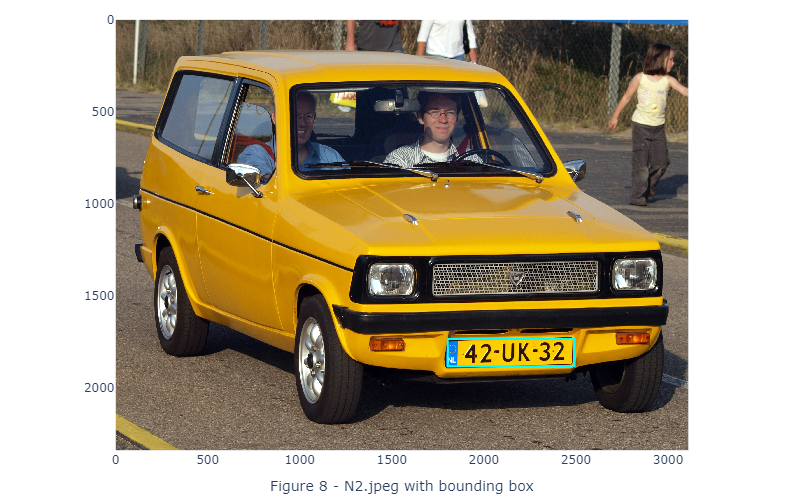

In [19]:
file_path = image_path[100] #path of our image N2.jpeg
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 1 - N2.jpeg with bounding box')
fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')
image_filepath =os.path.join(os.getcwd(),'Test','test_image.png')
Image(filename=image_filepath) 

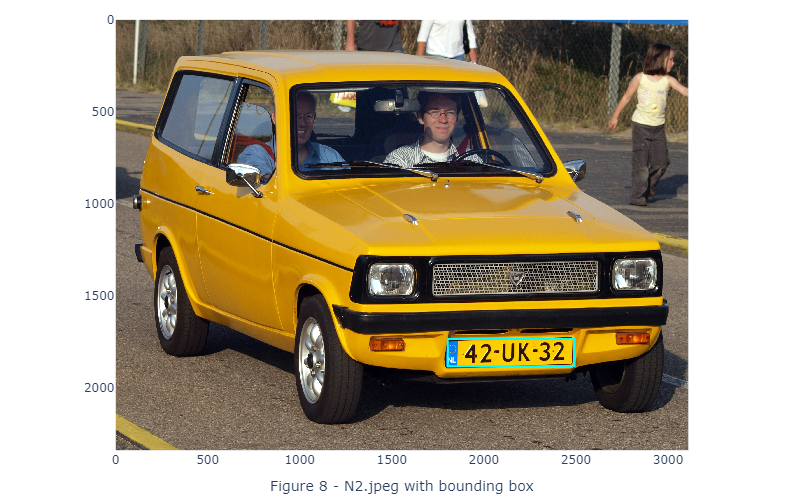

In [20]:
file_path = image_path[100] #path of our image N2.jpeg
img = cv2.imread(file_path) #read the image
# xmin-1804/ymin-1734/xmax-2493/ymax-1882 
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 1 - N2.jpeg with bounding box')
fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')
image_filepath =os.path.join(os.getcwd(),'Test','test_image.png')
Image(filename=image_filepath) 

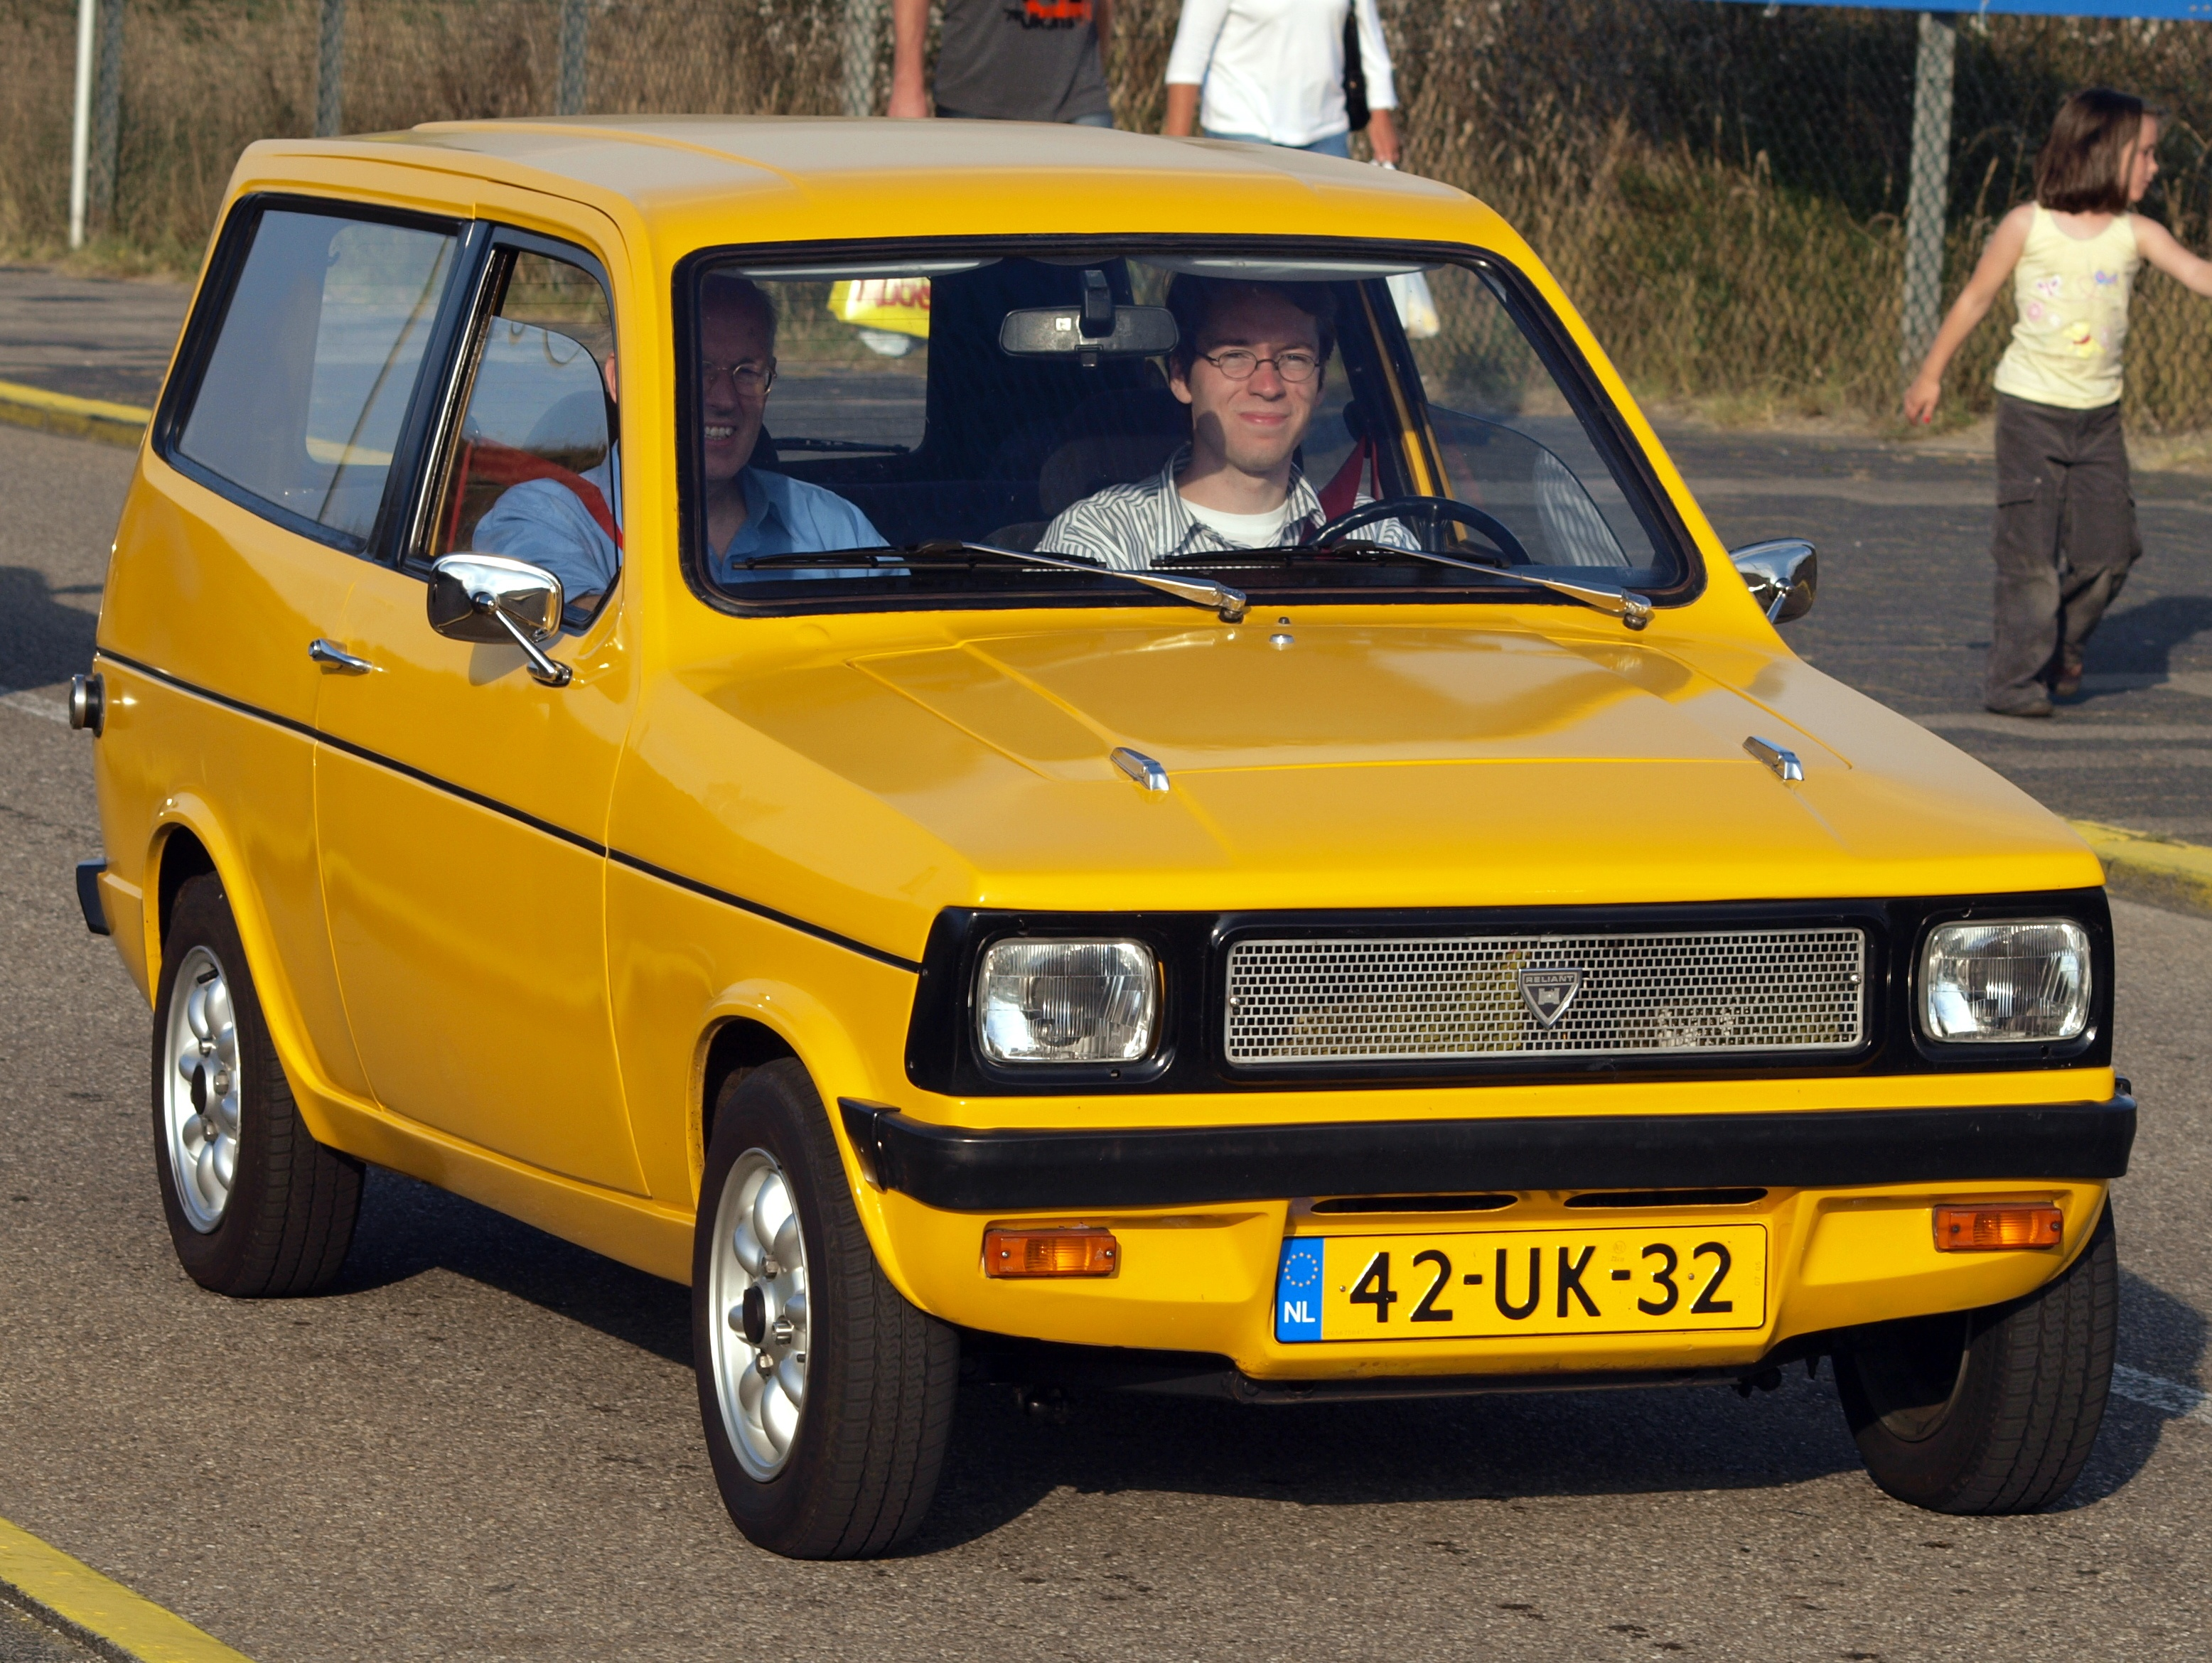

In [21]:
import cv2
from skimage import io
import plotly.express as px
# from PIL import Image
import os

file_path = image_path[100] # specify the path to your image
img = cv2.imread(file_path) # read the image
#xmin-1804/ymin-1734/xmax-2493/ymax-1882
img = io.imread(file_path) #Read the image
fig = px.imshow(img)
fig.update_layout(width=800, height=500, margin=dict(l=10,r=10,b=10,t=10),xaxis_title='jpeg with bounding box')
fig.add_shape(type='rect',x0=1804,x1=2493,y0=1734,y1=1882,xref='x',yref='y',line_color='cyan')

image_filepath = os.path.join(os.getcwd(),'images','N2.jpeg')
Image(filename=image_filepath)



# file_path = image_path[100] #path of our image N2.jpeg
# img = cv2.imread(file_path) #read the image
# # xmin-1804/ymin-1734/xmax-2493/ymax-1882 
# img = io.imread(file_path) #Read the image
# fig = px.imshow(img)
# fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 1 - N2.jpeg with bounding box')
# fig.add_shape(type='rect',x0=1804, x1=2493, y0=1734, y1=1882, xref='x', yref='y',line_color='cyan')
# image_filepath =os.path.join(os.getcwd(),'Test','test_image.png')
# Image(filename=image_filepath) 




